#                                           #Linear regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
#mean regression

In [4]:
trans_housing_data = pd.read_csv('Transformed_Housing_Data2.csv')

In [5]:
trans_housing_data

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,0,...,0,0,0,1,0,0,0,0,0,0
21605,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,0,...,0,1,0,0,0,0,0,0,0,0
21606,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,0,...,0,0,0,1,0,0,0,0,0,0
21607,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,0,...,0,0,0,0,1,0,0,0,0,0


In [7]:
# prediction based on mean
trans_housing_data['mean_sales']=trans_housing_data['Sale_Price'].mean()

In [8]:
trans_housing_data['mean_sales']

0        511618.558147
1        511618.558147
2        511618.558147
3        511618.558147
4        511618.558147
             ...      
21604    511618.558147
21605    511618.558147
21606    511618.558147
21607    511618.558147
21608    511618.558147
Name: mean_sales, Length: 21609, dtype: float64

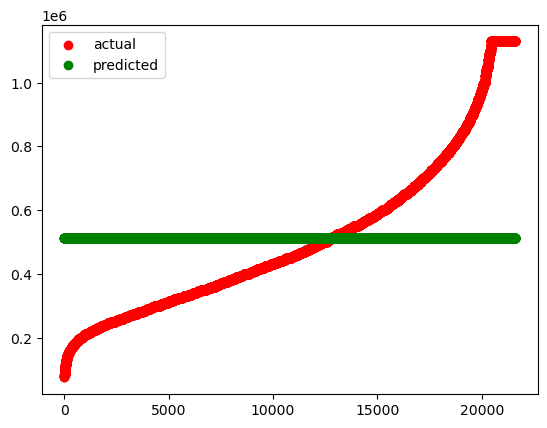

In [11]:
#visualizing
plt.figure(dpi=100)  # dots per inch(dpi) is used for resolution
k=range(0,len(trans_housing_data))
plt.scatter(k,trans_housing_data['Sale_Price'].sort_values(),color='red',label='actual')
plt.scatter(k,trans_housing_data['mean_sales'].sort_values(),color='green',label='predicted')
plt.legend()
plt.show()

In [14]:
#mean based on overall grade
grade_mean=pd.pivot_table(trans_housing_data,values='Sale_Price',columns='Overall Grade',aggfunc=np.mean)#also use data instead pd

In [15]:
grade_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [28]:
trans_housing_data['grade_mean']=0

for i in grade_mean.columns:
    trans_housing_data['grade_mean'][trans_housing_data['Overall Grade']==i] = grade_mean[i][0]

C:\Users\ramki\AppData\Local\Temp\ipykernel_22852\3948803003.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_housing_data['grade_mean'][trans_housing_data['Overall Grade']==i] = grade_mean[i][0]


In [26]:
grade_mean[4][0]

214381.0344827586

In [29]:
trans_housing_data['grade_mean']

0        402239.619779
1        402239.619779
2        301882.014720
3        402239.619779
4        537584.082097
             ...      
21604    537584.082097
21605    537584.082097
21606    402239.619779
21607    537584.082097
21608    402239.619779
Name: grade_mean, Length: 21609, dtype: float64

In [30]:
#residual plot
mean_difference=trans_housing_data['mean_sales']-trans_housing_data['Sale_Price']
grade_mean_difference=trans_housing_data['grade_mean']-trans_housing_data['Sale_Price']

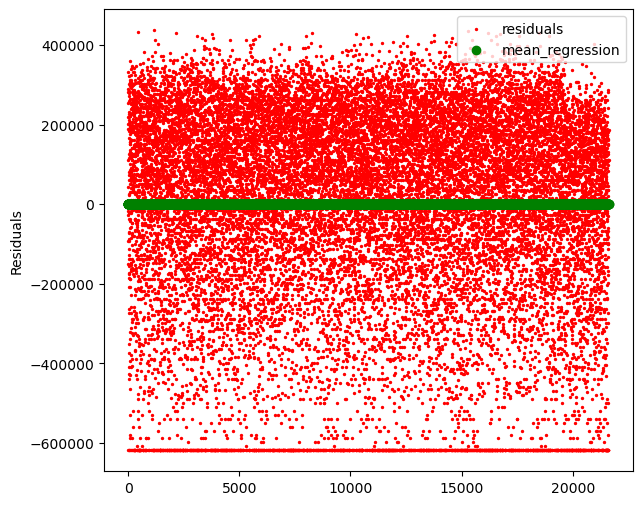

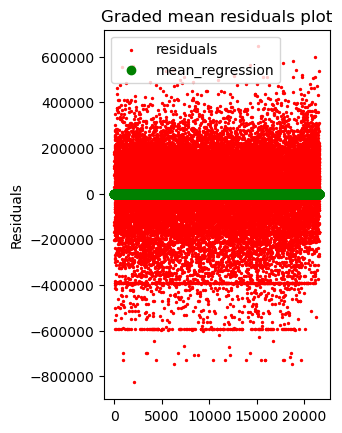

In [36]:
# for individual models
plt.figure(figsize=(15,6), dpi=100)  # dots per inch(dpi) is used for resolution
k=range(0,len(trans_housing_data))
l=[0 for i in range(len(trans_housing_data))]

plt.subplot(1,2,1)
plt.scatter(k, mean_difference, color='red', label='residuals',s=2)
plt.scatter(k,l,color='green',label='mean_regression')
plt.ylabel("Residuals")
plt.legend()
plt.show()

plt.subplot(1,2,2)
plt.scatter(k, grade_mean_difference, color='red', label='residuals',s=2)
plt.scatter(k,l,color='green',label='mean_regression')
plt.ylabel("Residuals")
plt.legend()
plt.title("Graded mean residuals plot")
plt.show()

In [ ]:
#Metrics
-> we use MAE(mean absolute error) to eliminate the cancelations of +ve and -ve observations
->MSE(mean squared error) penalizes the larger error
->RMSE -> gives the expected averge distance between the actual points and the predictions

In [ ]:
# r2_score in percentage terms

In [ ]:
#Linear regression

In [ ]:
#Gradient decent to optimize the parameters to get the best fit

In [1]:
#step1 Random initialization
def param_init(Y):
    #returns initialized values of m and c
    m = 0.1
    c = Y.mean()
    return m,c

In [2]:
#step2 generate predictions
def generate_predictions(m, c, X):
    prediction = []
    for x in X:
        pred = (m*x) + c
        prediction.append(pred)
    return prediction

In [3]:
#step3 Compute the cost
def compute_cost(prediction,Y):
    #sends mse
    cost = np.sum(((prediction-Y)**2)/len(Y))
    return cost

In [16]:
#step4 update the parameters using the gradients
def gradients(prediction, X, Y):
    n=len(Y)
    Gm = 2/n*np.sum((prediction-Y)*X)
    Gc = 2/n*np.sum((prediction-Y))
    return Gm,Gc
def param_update(m_old,c_old,Gm,Gc,alpha):
    m_new = m_old - alpha * Gm
    c_new = c_old - alpha * Gc
    return m_new,c_new

In [11]:
#Printing and ploting the final result 
def result(m,c,X,Y,cost,predictions,i):
    if i<max_iter-1 :
        print("Gradient decent converged at iteration {}".format(i))
    else:
        print("result after ",max_iter," iterations is ")
    
    plt.figure(figsize=(14,7),dpi=120)
    plt.scatter(X, Y, color='red', label='data  points',s=2)
    plt.plot(X,predictions,color='green',label='final regression line: m={}; c={}'.format(str(m),str(c)))
    plt.xlabel("Flat area")
    plt.ylabel("Sale Price")
    plt.legend()
    plt.title("final regression line")
    plt.show()

In [18]:

#Gradient decent algorithm
#Need to scale the data otherwise magnitude explodes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


sale_price =scaler.fit_transform(trans_housing_data['Sale_Price'].values.reshape(-1,1))
flat_area = scaler.fit_transform(trans_housing_data['Flat Area (in Sqft)'].values.reshape(-1,1))

In [19]:
max_iter = 1000
cost_old = 0
alpha = 0.01

In [20]:
#initialization
m,c = param_init(sale_price)

In [25]:
#gradient decent
for i in range(0,max_iter):
    #step2
    predictions = generate_predictions(m,c,flat_area)
    #step3
    cost_new = compute_cost(predictions,sale_price)
    
    #check gd converged
    if abs(cost_new-cost_old) < (10**(-7)):
        break
    
    #cal gradients
    gm,gc = gradients(predictions, sale_price, flat_area)
    
    #update
    m,c = param_update(m,c,gm,gc,alpha)
    
    #display for every 20 iterations
    if i%20 == 0:
        print('After iteration ',i,' :m = ',m,' ;c = ',c,' Cost = ',cost_new)
    
    cost_old = cost_new
    

Gradient decent converged at iteration 804


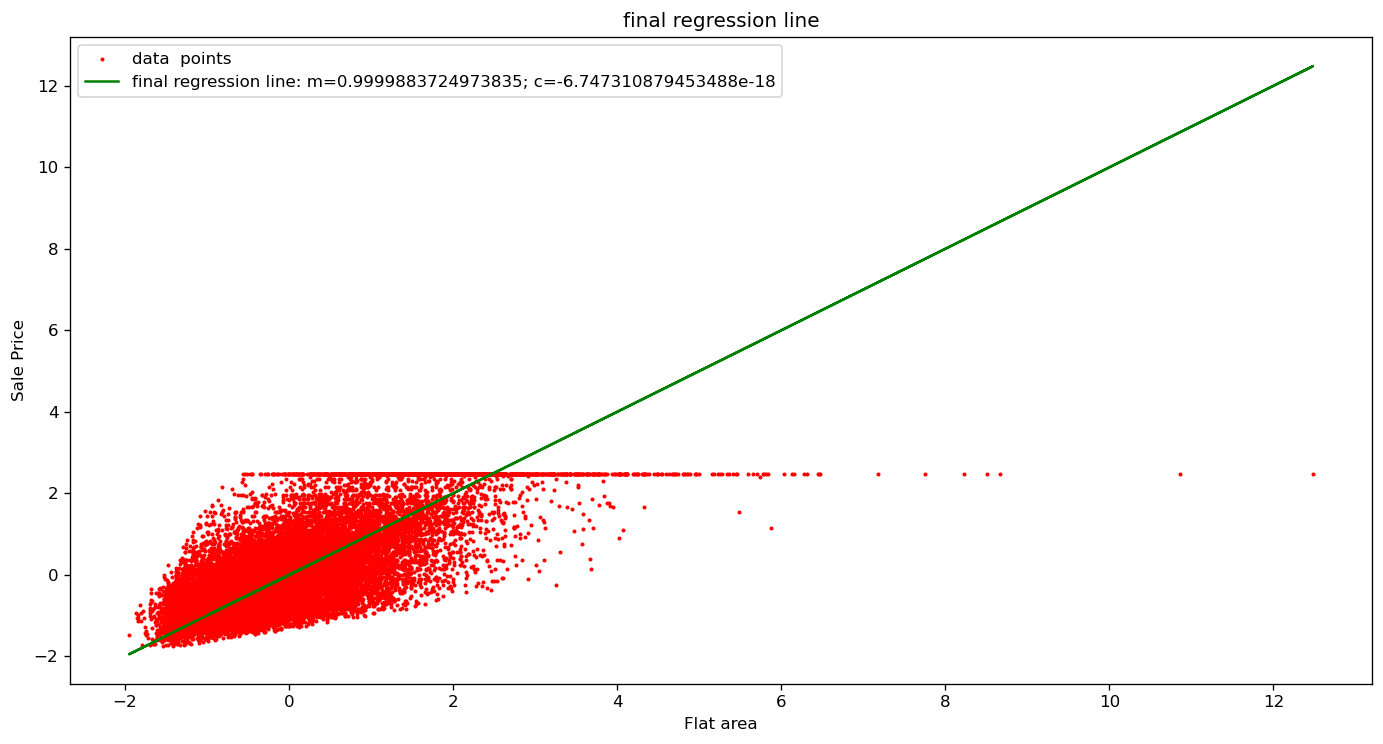

In [22]:
#final results
result(m,c,flat_area,sale_price,cost_new,predictions,i)

In [ ]:
# Tranformation of variables as X2,sqt(X),log(X) is due to change the non-linear relation into linear relation and makes variance of errors is constant

# Scaling the dataset

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Y = trans_housing_data['Sale_Price']
X = scaler.fit_transform(trans_housing_data.drop(columns = ['Sale_Price']))

X = pd.DataFrame(data = X, columns = trans_housing_data.drop(columns = ['Sale_Price']).columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


# Checking and removing multicollinearity

In [7]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
No of Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,...,-0.006578,-0.010603,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694
No of Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,...,0.063761,-0.032810,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871
Flat Area (in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,...,0.103841,-0.058817,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253
Lot Area (in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,...,0.021605,0.023684,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671
No of Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,...,0.023719,-0.003385,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868
No of Times Visited,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,...,0.401856,-0.065000,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923
Overall Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,...,0.070332,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area of the House from Basement (in Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,...,0.072099,-0.028348,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398
Basement Area (in Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,...,0.080595,-0.069149,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775
Age of House (in Years),-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,0.053395,-0.456711,-0.423848,0.133072,1.000000,...,0.026149,-0.070111,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492


In [ ]:
## Pair of independent variables with correlation greater than 0.5

In [9]:
k = X.corr()
z=[[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] > abs(0.5)) & (i!=j)]   #iloc is for numericals only and loc is for both
#syntax for list comprehension [element of final list      how to take values(loop)   condition to store values(condition)]
z, len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

In [ ]:
# 32/2 = 16 pairs are uniqe with high corelation > 0.5

# Calculating VIF

In [12]:
X.shape

(21609, 30)

In [11]:
X.shape[1]

30

In [17]:
array=X.values
array

array([[-0.39872425, -1.44752588, -0.97990474, ..., -0.11227393,
        -0.16884974, -0.04815825],
       [-0.39872425,  0.1756844 ,  0.53371803, ..., -0.11227393,
        -0.16884974, -0.04815825],
       [-1.4741152 , -1.44752588, -1.42636901, ..., -0.11227393,
        -0.16884974, -0.04815825],
       ...,
       [-1.4741152 , -1.77216793, -1.1541347 , ..., -0.11227393,
        -0.16884974, -0.04815825],
       [-0.39872425,  0.50032645, -0.5225511 , ..., -0.11227393,
        -0.16884974, -0.04815825],
       [-1.4741152 , -1.77216793, -1.1541347 , ..., -0.11227393,
        -0.16884974, -0.04815825]])

In [20]:
array[40] # while i is the predictor index

array([ 0.6766667 ,  0.50032645,  0.53371803, -0.23142957,  0.93681718,
       -0.30579041,  1.24515378,  0.94410585, -0.65869712, -0.987304  ,
        0.39298652,  1.32696716,  0.70533784, -0.26004551, -0.16746305,
       -0.29230641,  0.73513207, -0.59700254, -0.08957405, -0.21015532,
       -0.08718076, -0.35048124, -0.48215755, -0.41959981,  2.08727523,
       -0.21408627, -0.28771161, -0.11227393, -0.16884974, -0.04815825])

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X

VIF = pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])], index = vif_data.columns)

VIF

No of Bedrooms                                  1.639470
No of Bathrooms                                 3.374992
Flat Area (in Sqft)                          1481.681648
Lot Area (in Sqft)                              2.108079
No of Floors                                    2.127787
No of Times Visited                             1.432385
Overall Grade                                   2.967448
Area of the House from Basement (in Sqft)    1205.549115
Basement Area (in Sqft)                       345.465009
Age of House (in Years)                         2.629539
Latitude                                        2.471442
Longitude                                       1.672691
Living Area after Renovation (in Sqft)          3.068139
Lot Area after Renovation (in Sqft)             2.144347
Years Since Renovation                          2.788098
Condition_of_the_House_Excellent               53.578111
Condition_of_the_House_Fair                   166.129930
Condition_of_the_House_Good    

In [31]:
VIF[VIF == VIF.max()].index

Index(['Flat Area (in Sqft)'], dtype='object')

In [37]:
VIF.max()

1481.68164846137

In [32]:
VIF[VIF == VIF.max()].index[0]

'Flat Area (in Sqft)'

In [35]:
VIF==VIF.max()

No of Bedrooms                               False
No of Bathrooms                              False
Flat Area (in Sqft)                           True
Lot Area (in Sqft)                           False
No of Floors                                 False
No of Times Visited                          False
Overall Grade                                False
Area of the House from Basement (in Sqft)    False
Basement Area (in Sqft)                      False
Age of House (in Years)                      False
Latitude                                     False
Longitude                                    False
Living Area after Renovation (in Sqft)       False
Lot Area after Renovation (in Sqft)          False
Years Since Renovation                       False
Condition_of_the_House_Excellent             False
Condition_of_the_House_Fair                  False
Condition_of_the_House_Good                  False
Condition_of_the_House_Okay                  False
Ever_Renovated_Yes             

In [36]:
VIF[VIF==VIF.max()]

Flat Area (in Sqft)    1481.681648
dtype: float64

In [39]:
def MC_remover(data):
    VIF = pd.Series([variance_inflation_factor(data.values,i) for i in range(data.shape[1])],index = data.columns)
    
    if VIF.max() > 5:
        print(VIF[VIF == VIF.max()].index[0],' has been removed')
        data = data.drop(columns = VIF[VIF == VIF.max()].index[0])
        return data
    else:
        print('No multicollinearity exits anymore')
        return data
        

In [40]:
for i in range(7):
    vif_data = MC_remover(vif_data)
    
vif_data.head()

Flat Area (in Sqft)  has been removed
Condition_of_the_House_Fair  has been removed
No multicollinearity exits anymore
No multicollinearity exits anymore
No multicollinearity exits anymore
No multicollinearity exits anymore
No multicollinearity exits anymore


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [ ]:
#Remaining columns 

In [43]:
data = vif_data
VIF = pd.Series([variance_inflation_factor(data.values,i) for i in range(data.shape[1])],index = data.columns)
VIF

No of Bedrooms                               1.638990
No of Bathrooms                              3.373805
Lot Area (in Sqft)                           2.107495
No of Floors                                 2.127703
No of Times Visited                          1.432363
Overall Grade                                2.956967
Area of the House from Basement (in Sqft)    4.580042
Basement Area (in Sqft)                      1.974981
Age of House (in Years)                      2.626504
Latitude                                     2.471343
Longitude                                    1.672667
Living Area after Renovation (in Sqft)       3.063886
Lot Area after Renovation (in Sqft)          2.144068
Years Since Renovation                       2.788064
Condition_of_the_House_Excellent             1.206487
Condition_of_the_House_Good                  1.251488
Condition_of_the_House_Okay                  1.025386
Ever_Renovated_Yes                           2.955539
Waterfront_View_Yes         

In [ ]:
#vif < 5 is considered in data

# Further checking needed for vif > 5  columns

In [ ]:
#For colunms having vif > 5 need futher calculation of corelation and remove only if corr() > 0.5 (one among the two columns)
# we the use the correlation table or sn.heatmap(x.corr()) to check the the further correlation

# Train and Test data

In [44]:
x = vif_data
y = Y

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.3, random_state = 101)

# Linear Regression model

In [52]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()  # normalize = True
lr.fit(x_train,y_train) 

LinearRegression()

In [53]:
lr.coef_

array([ -1879.30405043,  15835.88676806,  12542.92257955,   2074.92546456,
        28946.11628435,  62456.0438161 ,  71614.03765276,  21201.48382853,
        29155.43041173,  22100.94202634, -23043.94033397,  20615.98519996,
         -984.60587075,  -8855.06762894,  13392.45305051,   6639.68902862,
        -2126.14746546,  12237.44523422,  10023.95388791,  11830.77249457,
        31902.00512493,  61012.99923925,  80194.10178751,  49176.37037813,
        72821.98341375,  38680.84524461,  65607.62123537,  22372.57905852])

In [54]:
predictions = lr.predict(x_test)
lr.score(x_test,y_test)

0.8423636090482004

# Verifing assumptions

# 1.Residual Plots

In [57]:
resid = predictions - y_test

residual_table = pd.DataFrame({'residuals':resid,'predictions':predictions})
residual_table = residual_table.sort_values(by = 'predictions')

In [58]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

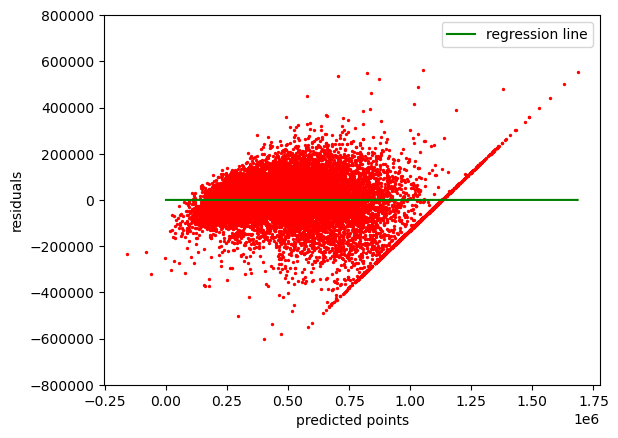

In [60]:
# test for homosedasticity
plt.figure(dpi=100)  # dots per inch(dpi) is used for resolution
plt.scatter(residual_table['predictions'],residual_table['residuals'],color='red',s=2)
plt.plot(z,k,color='green',label='regression line')
plt.legend()
plt.ylim(-800000,800000)
plt.xlabel('predicted points')
plt.ylabel('residuals')
plt.show()

# 2.Distribution of errors

In [ ]:
#test for normalization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


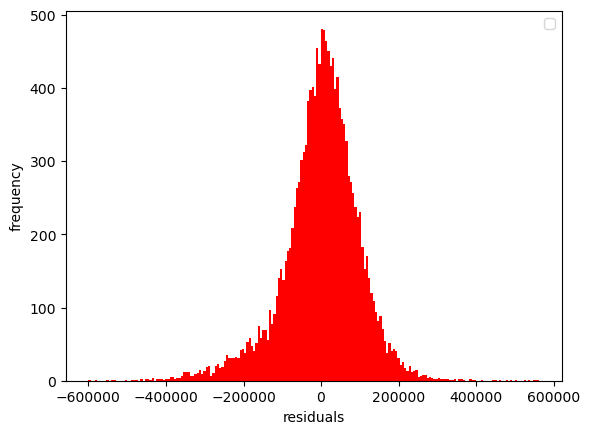

In [62]:
plt.figure(dpi=100)  # dots per inch(dpi) is used for resolution
plt.hist(residual_table['residuals'],color='red',bins=200)
plt.legend()
plt.ylabel('frequency')
plt.xlabel('residuals')
plt.show()

In [ ]:
# bell shape normal distribution

# Model Coefficients

In [63]:
coeff_table = pd.DataFrame({'column':x_train.columns,'coeff':lr.coef_})

coeff_table = coeff_table.sort_values( by = 'coeff')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


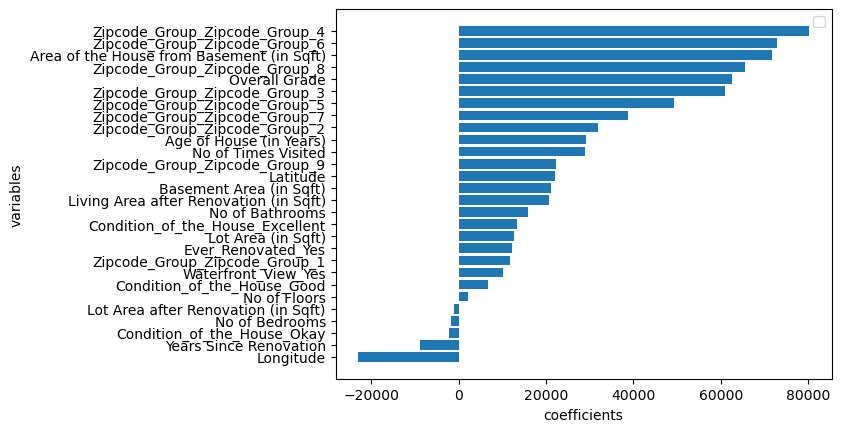

In [64]:
plt.figure(dpi=100)  # dots per inch(dpi) is used for resolution
plt.barh(coeff_table['column'],coeff_table['coeff'])
plt.legend()
plt.ylabel('variables')
plt.xlabel('coefficients')
plt.show()